In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [18]:
data = pd.read_csv('C:/Users/lenovo/Music/datasetsandcodefilesstockmarketprediction/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [20]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [22]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [23]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [24]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [25]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 11s - 315ms/step - loss: 0.0329
Epoch 2/20
35/35 - 4s - 110ms/step - loss: 0.0108
Epoch 3/20
35/35 - 4s - 114ms/step - loss: 0.0105
Epoch 4/20
35/35 - 4s - 105ms/step - loss: 0.0079
Epoch 5/20
35/35 - 4s - 127ms/step - loss: 0.0073
Epoch 6/20
35/35 - 5s - 133ms/step - loss: 0.0100
Epoch 7/20
35/35 - 5s - 129ms/step - loss: 0.0071
Epoch 8/20
35/35 - 4s - 114ms/step - loss: 0.0065
Epoch 9/20
35/35 - 4s - 115ms/step - loss: 0.0066
Epoch 10/20
35/35 - 4s - 121ms/step - loss: 0.0079
Epoch 11/20
35/35 - 4s - 108ms/step - loss: 0.0066
Epoch 12/20
35/35 - 4s - 105ms/step - loss: 0.0054
Epoch 13/20
35/35 - 4s - 107ms/step - loss: 0.0054
Epoch 14/20
35/35 - 4s - 107ms/step - loss: 0.0052
Epoch 15/20
35/35 - 4s - 106ms/step - loss: 0.0052
Epoch 16/20
35/35 - 4s - 110ms/step - loss: 0.0059
Epoch 17/20
35/35 - 4s - 115ms/step - loss: 0.0049
Epoch 18/20
35/35 - 4s - 124ms/step - loss: 0.0057
Epoch 19/20
35/35 - 5s - 143ms/step - loss: 0.0045
Epoch 20/20
35/35 - 4s - 111ms/step - l

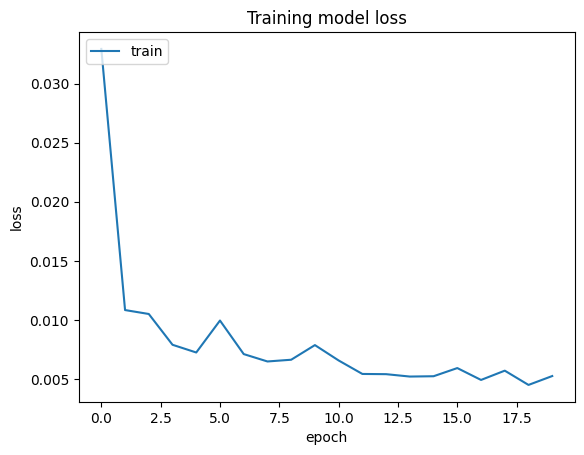

In [27]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [28]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [29]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


array([[1.2352638],
       [1.238126 ],
       [1.2479938],
       [1.2633421],
       [1.2769231],
       [1.2793566],
       [1.269403 ],
       [1.252968 ],
       [1.240115 ],
       [1.2345086],
       [1.2276673],
       [1.2176255],
       [1.2080524],
       [1.198985 ],
       [1.1957095],
       [1.1985453],
       [1.2134364],
       [1.2387724],
       [1.2693686],
       [1.3008462],
       [1.3171889],
       [1.318026 ],
       [1.302011 ],
       [1.2755506],
       [1.2491013],
       [1.2315409],
       [1.2249824],
       [1.2235533],
       [1.2183013],
       [1.2095805],
       [1.198924 ],
       [1.1861548],
       [1.167365 ],
       [1.1436312],
       [1.1308106],
       [1.1353546],
       [1.1530918],
       [1.1760999],
       [1.1993601],
       [1.213286 ],
       [1.2256888],
       [1.2394818],
       [1.2553636],
       [1.2708505],
       [1.2823957],
       [1.2858644],
       [1.2790704],
       [1.27107  ],
       [1.267686 ],
       [1.2717104],


In [30]:
predicted_price = sc.inverse_transform(y_pred)

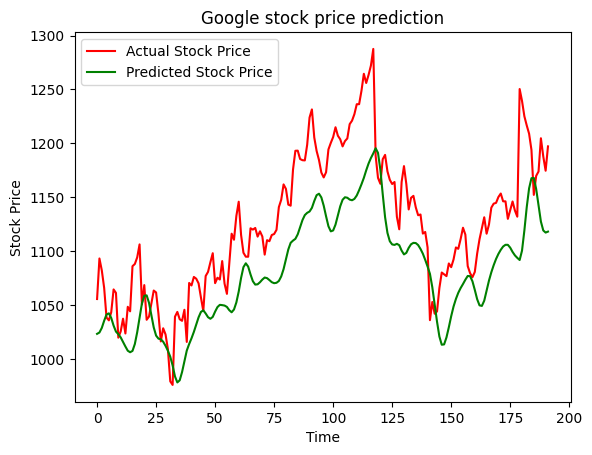

In [31]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()